# Model Training


### Feature Engineering

#### Steps 
* Exploring Features of the dataset
* Handling Missing Values
* Feature Engineering
* Feature Selection 

#### Import Packages and CSV

In [495]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv("C:/Users/dhanu/Downloads/New folder/New folder/cleaned_wppus.csv")

# Print shape of dataset
print(df.shape)

(266, 17)


In [496]:
df.head()

,date,other_united_states,qpp_o_united_states,other_new_england,qpp_new_england,other_connecticut,qpp_connecticut,other_maine,qpp_maine,wind_minnesota,qpp_w_minnesota,wind_california,qpp_w_california,wind_united_states,qpp_w_united_states,year,month
0,2001-01-01,6025,Greatest,678,medium,75,low,348,medium,86,Greatest,133,Greatest,389,Greatest,2001,1
1,2001-02-01,5310,Greatest,599,Greatest,77,low,293,Greatest,73,Greatest,148,Greatest,431,Greatest,2001,2
2,2001-03-01,5795,Greatest,660,high,96,negligible,327,high,67,Greatest,300,Greatest,532,Greatest,2001,3
3,2001-04-01,5827,Greatest,593,Greatest,92,negligible,277,Greatest,91,Greatest,393,high,685,Greatest,2001,4
4,2001-05-01,5738,Greatest,640,high,72,low,336,high,73,Greatest,378,high,635,Greatest,2001,5


##  Data cleaning and Data Transformation

### Feature Extraction

In EDA file , wind data has been seperated from other data.

### Other Data Manipulations

* **Based on the In-Sights from EDA, We Drop Columns which are not much impacting the target variable**

In [497]:
print(df)

           date  other_united_states qpp_o_united_states  other_new_england  \
0    2001-01-01                 6025            Greatest                678   
1    2001-02-01                 5310            Greatest                599   
2    2001-03-01                 5795            Greatest                660   
3    2001-04-01                 5827            Greatest                593   
4    2001-05-01                 5738            Greatest                640   
..          ...                  ...                 ...                ...   
261  2022-10-01                50478          negligible                998   
262  2022-11-01                56144          negligible               1084   
263  2022-12-01                52394          negligible               1070   
264  2023-01-01                53152          negligible                983   
265  2023-02-01                56626          negligible                962   

    qpp_new_england  other_connecticut qpp_connecti

### Types of Features 

* **Numerical Features**

In [498]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
print(num_features)

Num of Numerical Features : 9
['other_united_states', 'other_new_england', 'other_connecticut', 'other_maine', 'wind_minnesota', 'wind_california', 'wind_united_states', 'year', 'month']


* **Categorical Features**

In [499]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
print(cat_features)

Num of Categorical Features : 8
['date', 'qpp_o_united_states', 'qpp_new_england', 'qpp_connecticut', 'qpp_maine', 'qpp_w_minnesota', 'qpp_w_california', 'qpp_w_united_states']


* **Discrete Features**

In [500]:
discrete_feature=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_feature))
print(discrete_feature)

Num of Discrete Features : 2
['year', 'month']


In [501]:
year_features=[feature for feature in df.columns if 'date' in feature or 'month' in feature or 'year' in feature]
print('Num of Year Features :',len(year_features))
print(year_features)

Num of Year Features : 3
['date', 'year', 'month']


In [502]:
continuous_feature=[feature for feature in num_features if feature not in discrete_feature+year_features]
print('Num of Continuous Features :',len(continuous_feature))
print(continuous_feature)

Num of Continuous Features : 7
['other_united_states', 'other_new_england', 'other_connecticut', 'other_maine', 'wind_minnesota', 'wind_california', 'wind_united_states']


## Feature Selection

* Multicollinearity occurs when there are two or more independent variables in a multiple regression model, which have a high correlation among themselves. When some features are highly correlated.
* Multicollinearity can be detected using various techniques, one such technique being the Variance Inflation Factor(VIF).

### Outlier Removal and Checking Skewness

* For Skewed distributions: Use Inter-Quartile Range (IQR) proximity rule.

* The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

* where Q1 and Q3 are the 25th and 75th percentile of the dataset respectively, and IQR represents the inter-quartile range and given by Q3 – Q1.

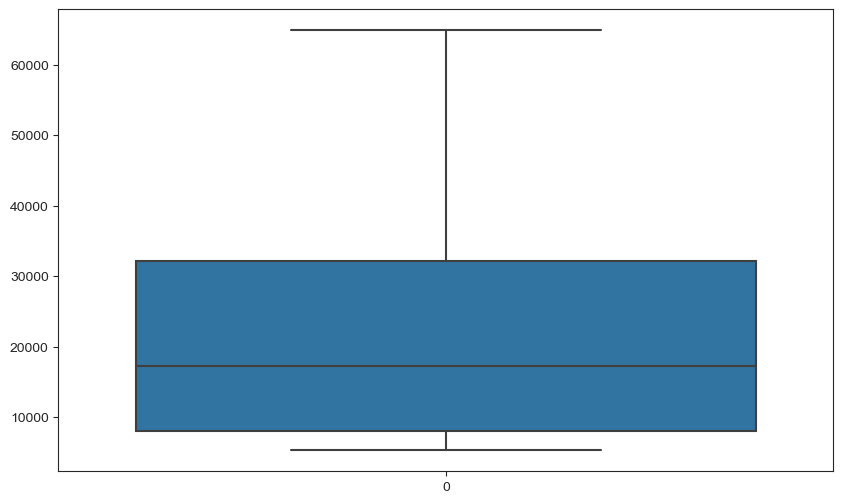

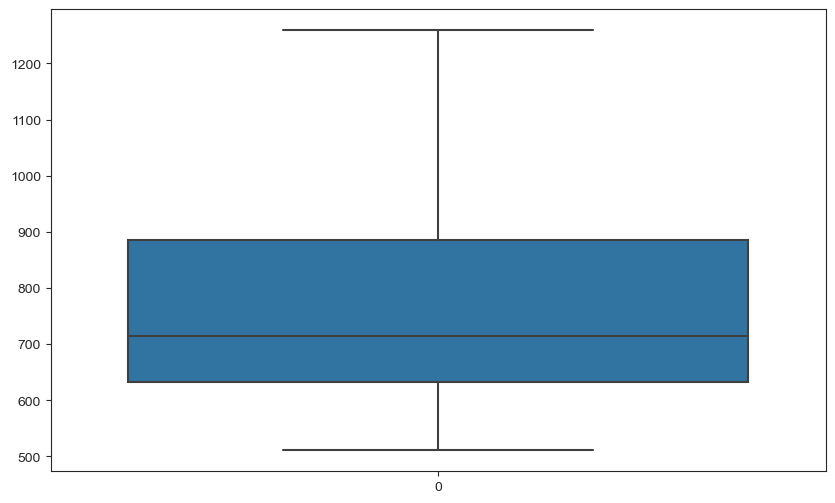

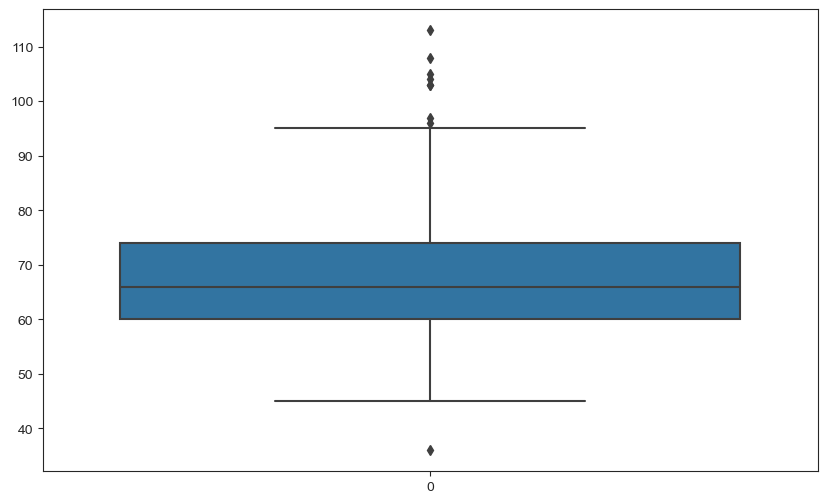

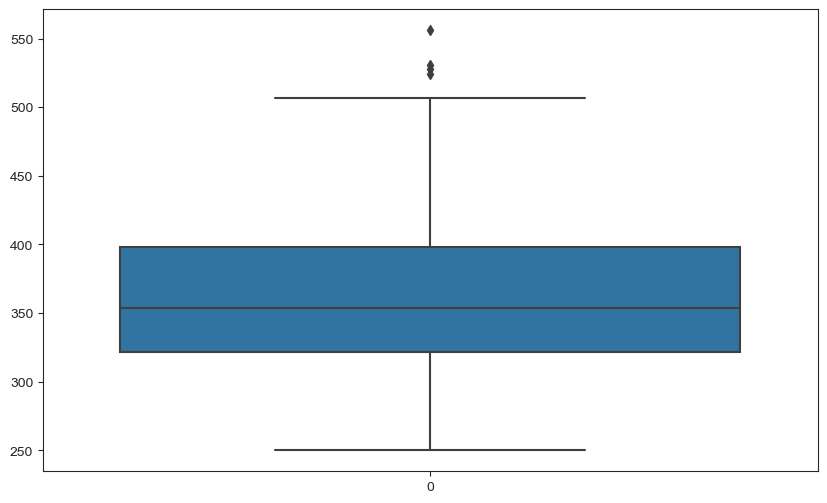

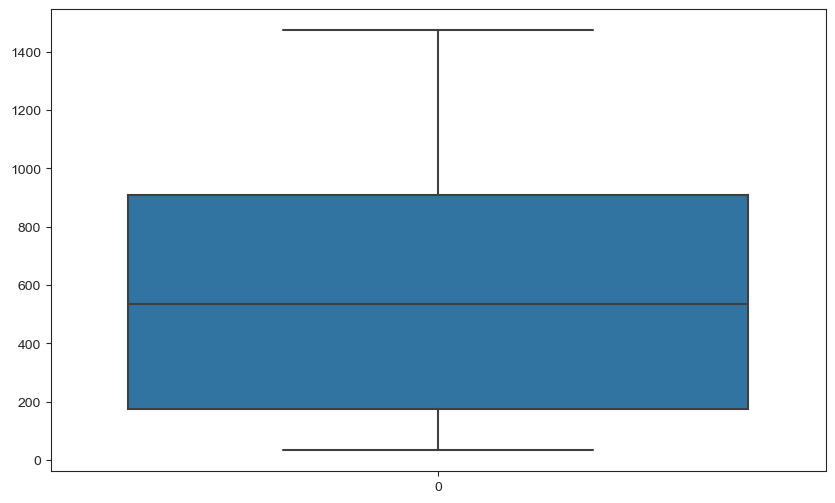

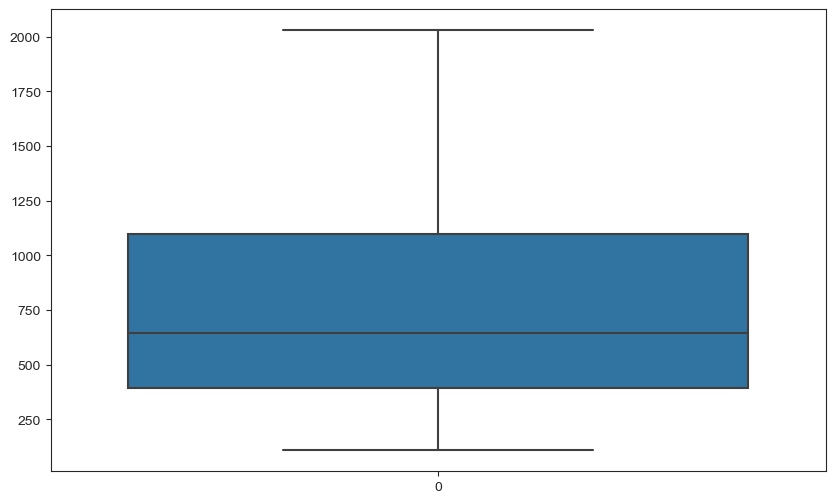

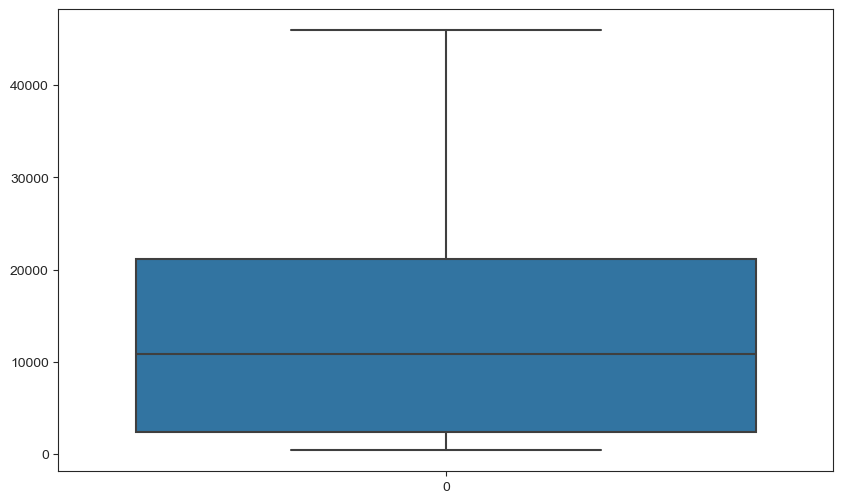

In [503]:
for i in continuous_feature:
        plt.figure(figsize=(10,6))
        sns.set_style('ticks')
        ax = sns.boxplot(df[i])

In [504]:
def detect_outliers(col):
    # Finding the IQR
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    print('\n ####', col , '####')
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df.loc[(df[col]>upper_limit), col]= upper_limit
    df.loc[(df[col]<lower_limit), col]= lower_limit    
    return df

In [505]:
for col in continuous_feature:
         detect_outliers(col)


 #### other_united_states ####
percentile25 8057.25
percentile75 32203.75
Upper limit 68423.5
Lower limit -28162.5

 #### other_new_england ####
percentile25 632.25
percentile75 885.0
Upper limit 1264.125
Lower limit 253.125

 #### other_connecticut ####
percentile25 60.0
percentile75 74.0
Upper limit 95.0
Lower limit 39.0

 #### other_maine ####
percentile25 321.5
percentile75 397.75
Upper limit 512.125
Lower limit 207.125

 #### wind_minnesota ####
percentile25 177.0
percentile75 907.5
Upper limit 2003.25
Lower limit -918.75

 #### wind_california ####
percentile25 396.0
percentile75 1096.5
Upper limit 2147.25
Lower limit -654.75

 #### wind_united_states ####
percentile25 2365.0
percentile75 21095.25
Upper limit 49190.625
Lower limit -25730.375


* **Split Dataframe to X and y**

* **Here we set a variable X i.e, independent columns, and a variable y i.e, dependent column as the “other_maine” column.**

In [506]:
from sklearn.model_selection import train_test_split
X = df
y = df['qpp_w_united_states']
X.drop('qpp_w_united_states',axis=1,inplace=True)
pd.pandas.set_option("display.max_columns", None)
print(df.shape,X.shape,y.shape)


(266, 16) (266, 16) (266,)


* **Check all columns which are in Train data set**

In [507]:
all_columns  = list(X.columns)

print(all_columns) 
len(all_columns)

['date', 'other_united_states', 'qpp_o_united_states', 'other_new_england', 'qpp_new_england', 'other_connecticut', 'qpp_connecticut', 'other_maine', 'qpp_maine', 'wind_minnesota', 'qpp_w_minnesota', 'wind_california', 'qpp_w_california', 'wind_united_states', 'year', 'month']


16

###  Feature Encoding

* **Extracting Categorical features from train set for feature encoding**

In [508]:
cat_features = [feature for feature in X.columns if X[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
print(cat_features)


Num of Categorical Features : 7
['date', 'qpp_o_united_states', 'qpp_new_england', 'qpp_connecticut', 'qpp_maine', 'qpp_w_minnesota', 'qpp_w_california']


In [509]:
df=df.fillna(df.mean())


* **Checking for Unique variables in each column**

In [510]:
for feature in cat_features:
    print(feature,':', X[feature].nunique())

date : 266
qpp_o_united_states : 5
qpp_new_england : 5
qpp_connecticut : 5
qpp_maine : 5
qpp_w_minnesota : 5
qpp_w_california : 5


## Pipeline for DataTransformation

 **One Hot Encoding for Columns which had lesser unique values and not ordinal**

* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.


**Binary Encoder is used for Country which had 170 unique values**
* Binary encoding is a combination of Hash encoding and one-hot encoding. In this encoding scheme, the categorical feature is first converted into numerical using an ordinal encoder. Then the numbers are transformed in the binary number. After that binary value is split into different columns.

* Binary encoding works really well when there are a high number of categories, Like Countries in our case

In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 266 non-null    object 
 1   other_united_states  266 non-null    float64
 2   qpp_o_united_states  266 non-null    object 
 3   other_new_england    266 non-null    float64
 4   qpp_new_england      266 non-null    object 
 5   other_connecticut    266 non-null    int64  
 6   qpp_connecticut      266 non-null    object 
 7   other_maine          266 non-null    float64
 8   qpp_maine            266 non-null    object 
 9   wind_minnesota       266 non-null    float64
 10  qpp_w_minnesota      266 non-null    object 
 11  wind_california      266 non-null    float64
 12  qpp_w_california     266 non-null    object 
 13  wind_united_states   266 non-null    float64
 14  year                 266 non-null    int64  
 15  month                266 non-null    int

In [512]:
# Create Column Transformer with 3 types of transformers
from sklearn.preprocessing import OneHotEncoder,StandardScaler,RobustScaler,MinMaxScaler,Normalizer,PowerTransformer, QuantileTransformer
from sklearn.compose import ColumnTransformer
#from category_encoders.binary import BinaryEncoder
num_features = [feature for feature in X.columns if X[feature].dtype != 'O']
#oh_columns = ['qpp_o_united_states','qpp_connecticut','qpp_w_california','qpp_new_england','qpp_w_united_states']
#bin_columns = ['qpp_maine']

numeric_transformer = StandardScaler()
#bin_transformer = BinaryEncoder()
#oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
         #('binary' ,bin_transformer, bin_columns),
         #("oh", oh_transformer, oh_columns),
         ("num", numeric_transformer, num_features)
    ]
)

reduce columns to around 20 and do EDA. Dont encode y. just standard scaler on X .

In [513]:
# Apply Column Transformer
X = preprocessor.fit_transform(X)


In [514]:
print(y.dtype)
print(y.shape)
print(X.shape)
print(num_features)


object
(266,)
(266, 9)
['other_united_states', 'other_new_england', 'other_connecticut', 'other_maine', 'wind_minnesota', 'wind_california', 'wind_united_states', 'year', 'month']


In [515]:
#import pickle
#pickle.dump(preprocessor, open('preprocess.pkl', 'wb'))

## Train Test Split

In [516]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,stratify=y,random_state=0)
X_train.shape, X_test.shape

((239, 9), (27, 9))

## Model Selection

* **Here should understand the Various Classification models with default values from these models we can choose top 4 with Highest Accuracy score and proceed with HyperParameter Tuning**

In [517]:
from sklearn.naive_bayes import GaussianNB
#from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, \
                            precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
#from xgboost import XGBClassifier
#from catboost import CatBoostClassifier

In [518]:
#from sklearn import preprocessing
#from sklearn import utils

#convert y values to categorical values from continuous
#lab = preprocessing.LabelEncoder()
#y_transformed = lab.fit_transform(y)

#view transformed values
#print(y_transformed)



In [519]:
print(X_train.shape)
print(y_train.shape)
print(y_train.dtype)
print(X_test.shape)
print(y_test.shape)
print(y_test.dtype)



(239, 9)
(239,)
object
(27, 9)
(27,)
object


In [520]:
print(df)


           date  other_united_states qpp_o_united_states  other_new_england  \
0    2001-01-01               6025.0            Greatest              678.0   
1    2001-02-01               5310.0            Greatest              599.0   
2    2001-03-01               5795.0            Greatest              660.0   
3    2001-04-01               5827.0            Greatest              593.0   
4    2001-05-01               5738.0            Greatest              640.0   
..          ...                  ...                 ...                ...   
261  2022-10-01              50478.0          negligible              998.0   
262  2022-11-01              56144.0          negligible             1084.0   
263  2022-12-01              52394.0          negligible             1070.0   
264  2023-01-01              53152.0          negligible              983.0   
265  2023-02-01              56626.0          negligible              962.0   

    qpp_new_england  other_connecticut qpp_connecti

In [521]:
models = {
    #"Random Forest": RandomForestClassifier(),
   "Naive Bayes": GaussianNB(),
   #"Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
   #"Linear Regression":LinearRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
   # "XGBClassifier": XGBClassifier(), 
   #  "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
#    "AdaBoost Classifier": AdaBoostClassifier()
}
#X_test.toarray()
#X_train.toarray()
#X.toarray()
#import numpy as np
#from scipy.sparse import csr_matrix
#temp = csr_matrix(X_train)
#X_train = temp.toarray()

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    #model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    #model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    #model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    #model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    #model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    #model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall


    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    #print('- F1 score: {:.4f}'.format(model_train_f1))
    #print('- Precision: {:.4f}'.format(model_train_precision))
    #print('- Recall: {:.4f}'.format(model_train_recall))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    #print('- F1 score: {:.4f}'.format(model_test_f1))
    #print('- Precision: {:.4f}'.format(model_test_precision))
    #print('- Recall: {:.4f}'.format(model_test_recall))
    
    print('='*35)
    print('\n')

Naive Bayes
Model performance for Training set
- Accuracy: 0.9079
----------------------------------
Model performance for Test set
- Accuracy: 0.9259


Logistic Regression
Model performance for Training set
- Accuracy: 0.9121
----------------------------------
Model performance for Test set
- Accuracy: 0.8148


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9038
----------------------------------
Model performance for Test set
- Accuracy: 0.7778


Support Vector Classifier
Model performance for Training set
- Accuracy: 0.8996
----------------------------------
Model performance for Test set
- Accuracy: 0.8889




In [522]:
knn_params = {"n_neighbors": [2, 3, 10, 20, 40, 50]}

rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8, 12, 20, 30],
                  "n_estimators": [100, 200, 300],
                  "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

cat_params = {"learning_rate": [0.1, 0.01],
              "max_depth": [5, 8, 12, 20, 30]}

In [523]:
randomcv_models = [('KNN', KNeighborsClassifier(), knn_params),
                   #("RF", RandomForestClassifier(), rf_params),
                  # ('XGBoost', XGBClassifier(), xgboost_params),
                  # ('CatBoost', CatBoostClassifier(verbose=False), cat_params)
                   ]

In [524]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    rf_random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    rf_random.fit(X_train, y_train)
    model_param[name] = rf_random. best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 6 candidates, totalling 18 fits
---------------- Best Params for KNN -------------------
{'n_neighbors': 3}


### Models Re-Trained with Best Parameters

In [525]:
from sklearn.metrics import roc_auc_score,roc_curve
models = {
   # "Random Forest": RandomForestClassifier(n_estimators=1000, min_samples_split=2, max_features= 7, max_depth= None),
    "K-Neighbors Classifier": KNeighborsClassifier(n_neighbors=10),
    #"XGBClassifier": XGBClassifier(n_estimators= 200, max_depth= 30, learning_rate= 0.1, colsample_bytree= 0.4, n_jobs=-1), 
    #"CatBoosting Classifier": CatBoostClassifier(max_depth= 12, learning_rate= 0.1,verbose=False),
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    #model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    #model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    #model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
   # model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)

    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
   # model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    #model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    #model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    #model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc



    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    #print('- F1 score: {:.4f}'.format(model_train_f1))
    #print('- Precision: {:.4f}'.format(model_train_precision))
    #print('- Recall: {:.4f}'.format(model_train_recall))
    #print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    #print('- F1 score: {:.4f}'.format(model_test_f1))
    #print('- Precision: {:.4f}'.format(model_test_precision))
    #print('- Recall: {:.4f}'.format(model_test_recall))
    #print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    
    print('='*35)
    print('\n')

K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.8159
----------------------------------
Model performance for Test set
- Accuracy: 0.8519




### Plot ROC-AUC curve

from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=1000, min_samples_split=2, max_features= 'auto', max_depth= None),
    'auc': 0.8618
},
{
    'label': 'XGBoost Classifier',
    'model': XGBClassifier(n_estimators= 200, max_depth= 20, learning_rate= 0.1, colsample_bytree= 0.8, n_jobs=-1),
    'auc': 0.8073
},
{
    'label': 'KNN Classifier',
    'model': KNeighborsClassifier(n_neighbors=10),
    'auc': 0.8629 
},
{
    'label': 'CatBoost Classifier',
    'model': CatBoostClassifier(max_depth= 12, learning_rate= 0.1,verbose=False),
    'auc': 0.8615
},
    
]



# Below for loop iterates through your models list
for m in auc_models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], m['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positwive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig(r"./images/roc_auc/auc.png")
plt.show()   # Display

### Feature Selection for Model Deployment

best_xgb = XGBClassifier(n_estimators= 200, max_depth= 30, learning_rate= 0.1, colsample_bytree= 0.4, n_jobs=-1)
best_xgb = best_xgb.fit(X_train,y_train)
xgb_pred = best_xgb.predict(X_test)
score = accuracy_score(y_test,xgb_pred)
cr = classification_report(y_test,xgb_pred)

print("FINAL XGB")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

In [ ]:
#from sklearn.metrics import ConfusionMatrixDisplay
#ConfusionMatrixDisplay.from_estimator(best_xgb, X_test, y_test)

In [ ]:
#import pickle
 
# Save the trained model as a pickle file.
#pickle.dump(best_xgb, open('classificationmodel.pkl', 'wb'))